Part of EDA is going to include feature engineering. Sometimes you may have to do additional cleaning. These lines can be blurred?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
df = pd.read_csv('job_data_cleaned.csv')

In [3]:
print(df.columns)

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Easy Apply', 'job_title', 'min_salary', 'max_salary', 'avg_salary',
       'python_yn', 'company_text', 'location_state', 'work_at_hq', 'age'],
      dtype='object')


In [4]:
df.drop(columns = 'Unnamed: 0', inplace = True, axis = 1)

In [5]:
df['job_title'].value_counts().sort_values(ascending=False).head(20)

Data Analyst               443
Senior Data Analyst        105
Junior Data Analyst         30
Business Data Analyst       28
Sr. Data Analyst            26
Data Analyst II             20
Lead Data Analyst           19
Data Quality Analyst        18
Data Analyst Junior         17
Data Governance Analyst     16
Data Reporting Analyst      14
Analyst                     14
Financial Data Analyst      13
Data Analyst I              11
Data Analyst III            11
Sr Data Analyst             10
Senior Analyst              10
Marketing Data Analyst      10
Data Warehouse Analyst       8
Data Management Analyst      8
Name: job_title, dtype: int64

It is quite clear from the above that analyst is a very popular word within job titles. We should attempt to amalgamate these titles into broader terms.

In [6]:
def title_condense(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'machine learning'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
    
def level(title):
    if 'sr' in title.lower() or 'sr.' in title.lower() or 'senior' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower() or 'manager' in title.lower():
        return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower() or 'junior' in title.lower():
        return 'junior'
    else:
        return 'na'

In [7]:
df['title_simplified'] = df['Job Title'].apply(title_condense)
df.title_simplified.value_counts()

analyst           2221
data engineer       17
data scientist      14
Name: title_simplified, dtype: int64

Wow - that's not good! It looks like our data set is almost all analysts. Perhaps the data was collected looking for the term 'analyst' rather than 'scientist'. When I gather my own data in the future this problem will be solved and we'll get a higher variety of roles.

In [8]:
df['seniority'] = df['Job Title'].apply(level)
df.seniority.value_counts()

na        1673
senior     506
junior      73
Name: seniority, dtype: int64

In [9]:
df['num_of_competitors'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x != '-1' else 0)
df.num_of_competitors.value_counts()

0    1731
3     362
2     124
1      34
4       1
Name: num_of_competitors, dtype: int64

In [10]:
df['desc_len'] = df['Job Description'].apply(lambda x: len(x))
df.desc_len

0       7132
1       4732
2       4715
3       5294
4       3418
        ... 
2247     504
2248    4276
2249    2405
2250    4344
2251    3438
Name: desc_len, Length: 2252, dtype: int64

In [11]:
df.describe()

Rating      Founded   min_salary   max_salary   avg_salary  \
count  2252.000000  2252.000000  2252.000000  2252.000000  2252.000000   
mean      3.160080  1398.255329    54.266874    89.979130    72.123002   
std       1.665393   902.040151    19.575375    29.315605    23.600734   
min      -1.000000    -1.000000    24.000000    38.000000    33.500000   
25%       3.100000    -1.000000    41.000000    70.000000    58.000000   
50%       3.600000  1979.000000    50.000000    87.000000    69.000000   
75%       4.000000  2002.000000    64.000000   104.000000    80.500000   
max       5.000000  2019.000000   113.000000   190.000000   150.000000   

         python_yn   work_at_hq          age  num_of_competitors      desc_len  
count  2252.000000  2252.000000  2252.000000         2252.000000   2252.000000  
mean      0.282860     0.289076    29.151421            0.609236   3150.595471  
std       0.450489     0.453434    44.657268            1.148295   1872.903233  
min       0.000000     0.000000    -1.000000            0.000000      7.000000  
25%       0.000000     0.000000    -1.000000            0.000000   1782.000000  
50%       0.000000     0.000000    16.000000            0.000000   2913.500000  
75%       1.000000     1.000000    33.250000            0.000000   4154.750000  
max       1.000000     1.000000   338.000000            4.000000  18851.000000

Typically it is a good idea at this point to create histograms of our features to get a "feel" for them and see if we can notice anything. EDA is often a very iterative approach where your plans can change on the fly as you discover and become familiar with your data. When it comes to presenting the data to others, you would expect to clean up your findings into a more digestable format once you are finished.

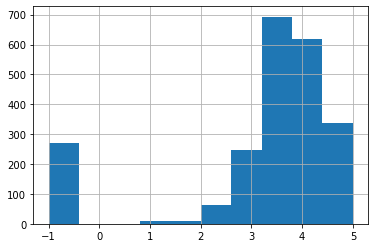

In [12]:
df.Rating.hist()

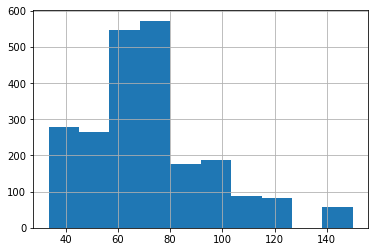

In [13]:
df.avg_salary.hist()

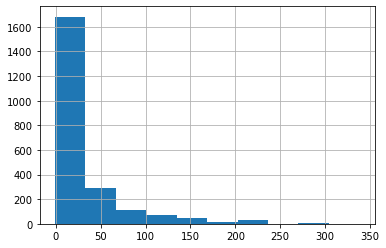

In [14]:
df.age.hist() # this needs normalising

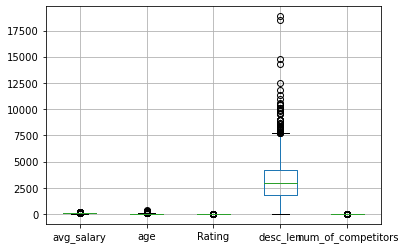

In [15]:
df.boxplot(['avg_salary', 'age', 'Rating', 'desc_len', 'num_of_competitors']) # good example of why we need to normalise

Now we'll look at correlations between continuous variables. Then categorical.

In [16]:
df[['age','avg_salary','Rating','desc_len', 'num_of_competitors']].corr()

age  avg_salary    Rating  desc_len  \
age                 1.000000   -0.075872  0.184380  0.253878   
avg_salary         -0.075872    1.000000  0.004301 -0.033362   
Rating              0.184380    0.004301  1.000000 -0.018837   
desc_len            0.253878   -0.033362 -0.018837  1.000000   
num_of_competitors  0.297670    0.002233  0.166461  0.109131   

                    num_of_competitors  
age                           0.297670  
avg_salary                    0.002233  
Rating                        0.166461  
desc_len                      0.109131  
num_of_competitors            1.000000

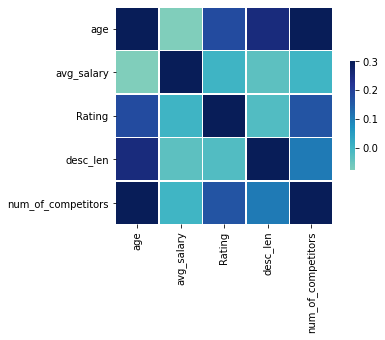

In [17]:
sns.heatmap(df[['age','avg_salary','Rating','desc_len','num_of_competitors']].corr(),vmax=.3, center=0, cmap="YlGnBu",
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

It looks like the age of a company correlates with the length of description and the number of competitors. This makes sense, an older company will generally have a richer history and more to say about itself in a description. You would also expect them to have more competitors.

In [18]:
print(df.columns)

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Easy Apply', 'job_title', 'min_salary', 'max_salary', 'avg_salary',
       'python_yn', 'company_text', 'location_state', 'work_at_hq', 'age',
       'title_simplified', 'seniority', 'num_of_competitors', 'desc_len'],
      dtype='object')


In [19]:
categories = ['Location', 'Headquarters', 'Size','Type of ownership', 'Industry', 'Sector', 'Revenue', 'company_text', 'location_state', 'work_at_hq', 
              'python_yn', 'title_simplified', 'seniority']

Barplot for Location (total: 253)


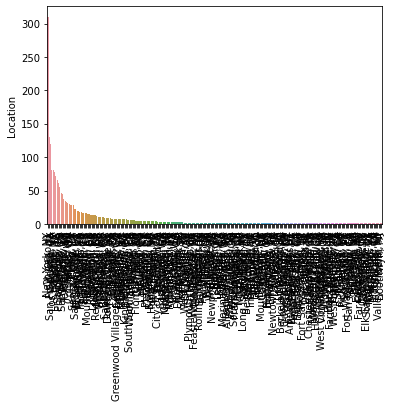

Barplot for Headquarters (total: 483)


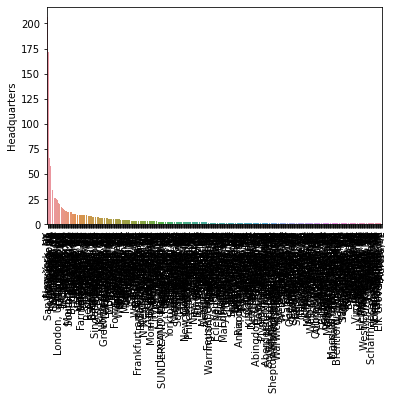

Barplot for Size (total: 9)


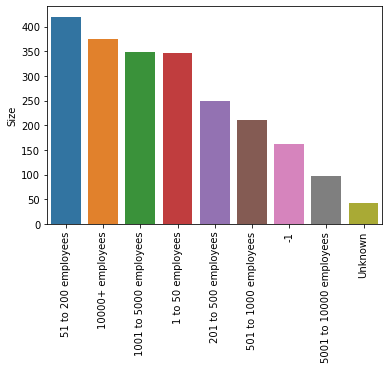

Barplot for Type of ownership (total: 15)


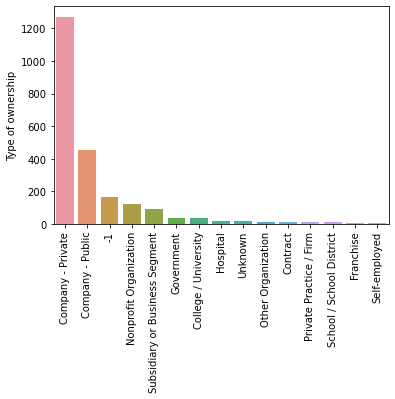

Barplot for Industry (total: 89)


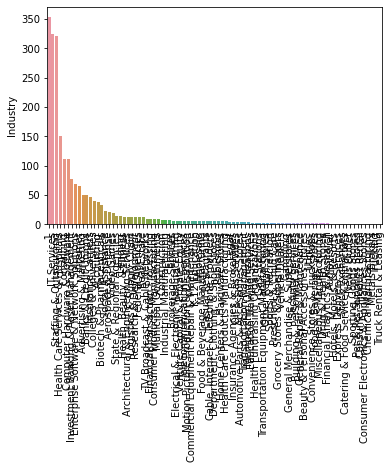

Barplot for Sector (total: 25)


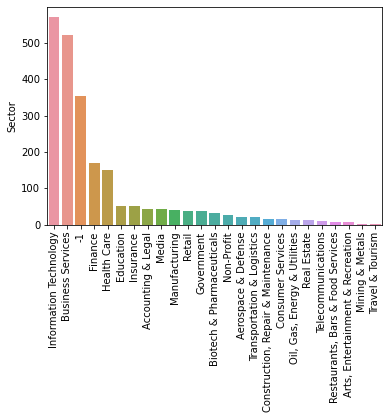

Barplot for Revenue (total: 14)


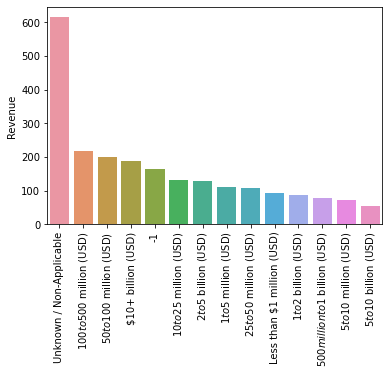

Barplot for company_text (total: 1501)


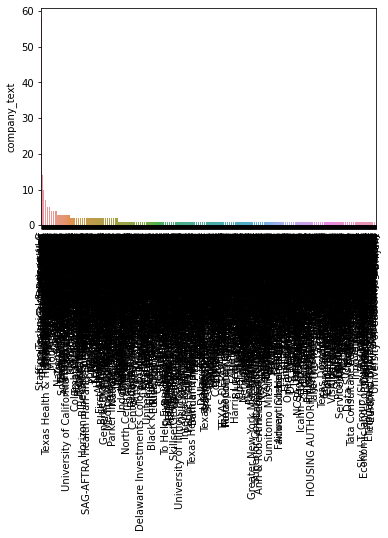

Barplot for location_state (total: 249)


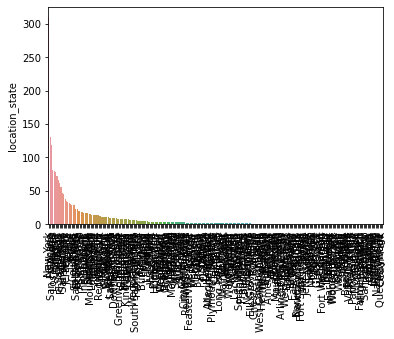

Barplot for work_at_hq (total: 2)


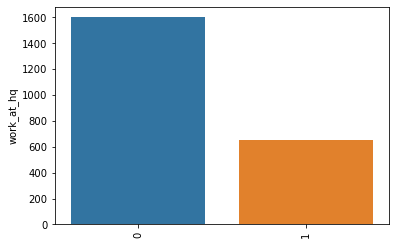

Barplot for python_yn (total: 2)


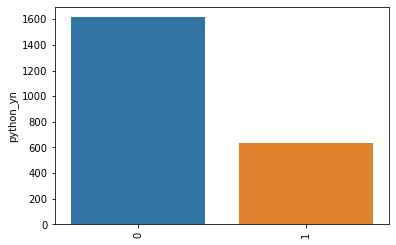

Barplot for title_simplified (total: 3)


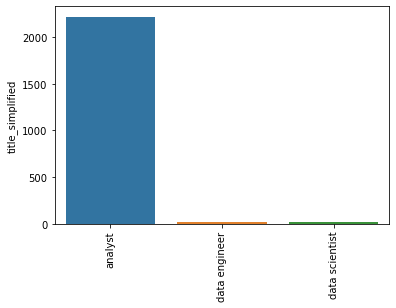

Barplot for seniority (total: 3)


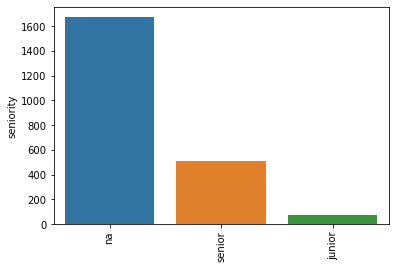

In [20]:
for i in categories:
    number_of_categories = df[i].value_counts()
    print("Barplot for %s (total: %d)" % (i, len(number_of_categories)))
    chart = sns.barplot(x=number_of_categories.index, y=number_of_categories)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

Well, we have some pretty ugly looking plots in there. Thankfully some of them are more useful than others. Let's dive into some of those messy ones and see if we can get a clearer view at the useful info.

Barplot for Location (total: 20)


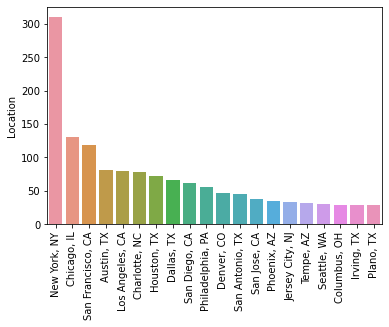

Barplot for Headquarters (total: 20)


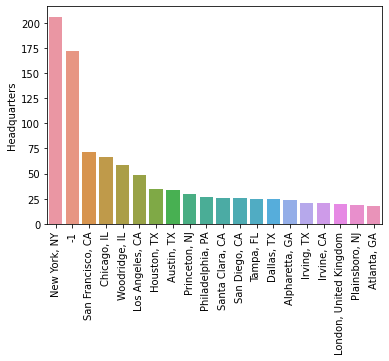

Barplot for company_text (total: 20)


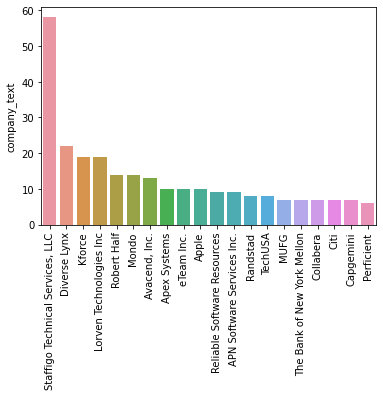

In [21]:
for i in ['Location', 'Headquarters', 'company_text']:
    number_of_categories = df[i].value_counts()[:20]
    print("Barplot for %s (total: %d)" % (i, len(number_of_categories)))
    chart = sns.barplot(x=number_of_categories.index, y=number_of_categories)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [22]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Easy Apply', 'job_title', 'min_salary', 'max_salary', 'avg_salary',
       'python_yn', 'company_text', 'location_state', 'work_at_hq', 'age',
       'title_simplified', 'seniority', 'num_of_competitors', 'desc_len'],
      dtype='object')

In [23]:
pd.pivot_table(df, index = ['title_simplified', 'seniority'], values = 'avg_salary')

avg_salary
title_simplified seniority            
analyst          junior      63.232877
                 na          71.755145
                 senior      74.867944
data engineer    na          68.076923
                 senior      63.750000
data scientist   na          66.062500
                 senior      77.083333

In [24]:
pd.pivot_table(df, index = 'location_state', values = 'avg_salary').sort_values('avg_salary', ascending=False)

avg_salary
location_state            
Marin City      126.000000
Daly City       126.000000
Los Gatos       122.666667
Whittier        122.500000
Pico Rivera     122.500000
...                    ...
Sandy            36.500000
Draper           36.500000
Riverton         36.500000
American Fork    36.500000
Stafford         33.500000

[249 rows x 1 columns]

In [25]:
df_pivots = df[['Rating', 'Industry', 'Sector', 'Revenue', 'num_of_competitors', 'python_yn', 'Type of ownership','avg_salary']]

In [26]:
for i in df_pivots.columns[:-1]:
    print(pd.pivot_table(df_pivots, index = i, values = 'avg_salary').sort_values('avg_salary', ascending = False))

        avg_salary
Rating            
 2.2     95.666667
 4.4     82.366667
 1.7     82.000000
 1.6     80.000000
 2.0     79.750000
 2.4     77.350000
 4.5     76.925532
 3.2     76.901099
 2.1     76.625000
 4.0     76.232558
 3.9     75.210714
 4.6     74.760870
 4.1     74.424370
 2.3     73.888889
 4.2     73.159574
 4.8     72.913793
-1.0     72.867647
 2.5     72.781250
 3.4     72.158416
 5.0     72.125954
 3.7     71.803030
 3.3     71.440367
 4.7     71.000000
 3.0     70.982456
 3.8     69.534615
 3.6     69.207407
 3.1     68.801471
 4.3     68.172727
 2.8     67.825581
 3.5     67.240000
 2.9     66.887500
 2.6     65.821429
 1.0     64.250000
 2.7     62.780000
 4.9     61.470588
 1.9     61.250000
 1.8     58.250000
                                    avg_salary
Industry                                      
Drug & Health Stores                 95.250000
Education Training Services          92.833333
Health Care Products Manufacturing   89.800000
Sports & Recreation     

For the grand finale, let's create a simple word cloud and see if it produces anything interesting.

In [27]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS

import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\James\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\James\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


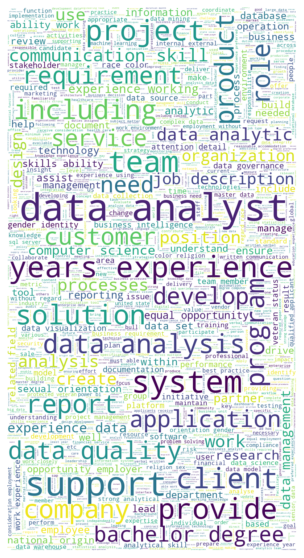

In [28]:
words = " ".join(df['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([i for i in words_filtered])

wc= WordCloud(background_color="white", random_state=1, stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

In [29]:
df.to_csv('eda_data.csv')